In [2]:
import glob
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import robust_scale

In [3]:
from castor import spec2sqr
from spectres import spectres

In [16]:
%matplotlib inline
plt.style.use("seaborn-darkgrid")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["image.cmap"] = "Spectral"

In [17]:
pollux = glob.glob("/mnt/arch/POLLUX/spec/*")
wave, flux, norm = np.loadtxt(random.choice(pollux), unpack=True)
wi = 3690 < wave; wf = wave < 9100; ww = wi * wf

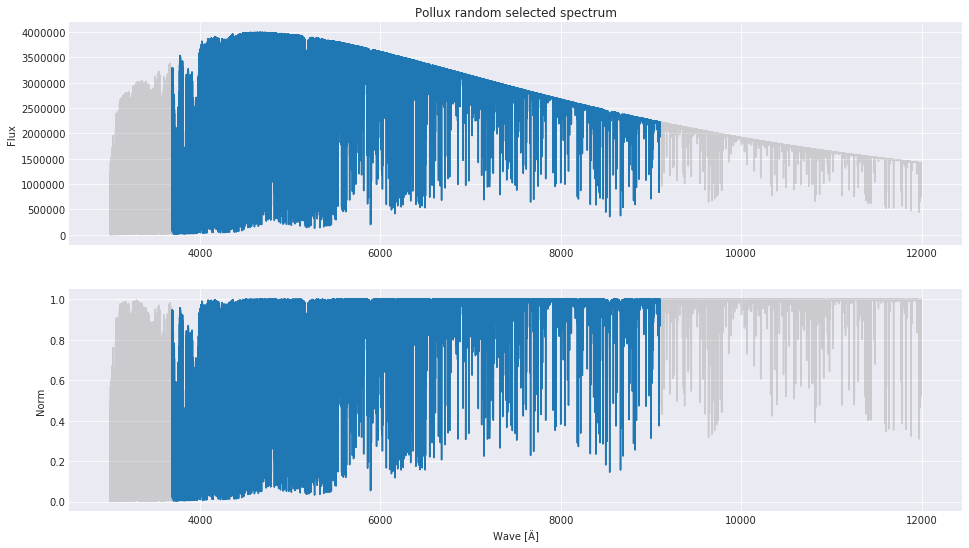

In [18]:
plt.subplot(2, 1, 1)
plt.title("Pollux random selected spectrum")
plt.ylabel("Flux")
plt.plot(wave, flux, color="gray", alpha=0.3);
plt.plot(wave[ww], flux[ww])

plt.subplot(2, 1, 2)
plt.ylabel("Norm")
plt.plot(wave, norm, color="gray", alpha=0.3)
plt.plot(wave[ww], norm[ww])
plt.xlabel("Wave [Ä]");

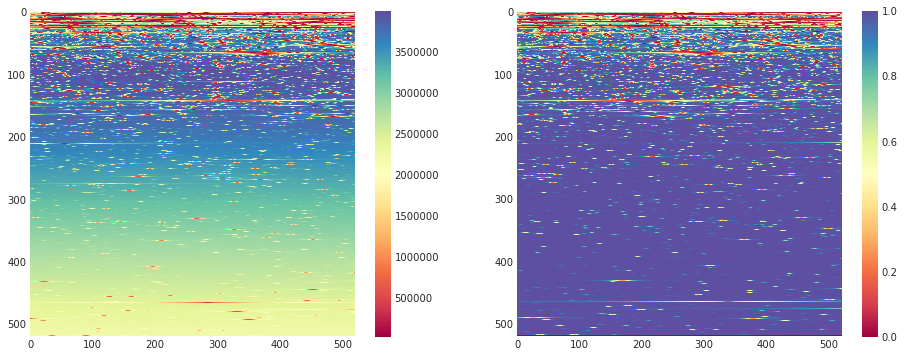

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(121); plt.imshow(spec2sqr(flux[ww], cut=True)); plt.colorbar(); plt.grid(False)
plt.subplot(122); plt.imshow(spec2sqr(norm[ww])); plt.colorbar(); plt.grid(False)

In [20]:
new = np.linspace(3690, 9100, 64*64)
lux = spectres(new, wave, flux)

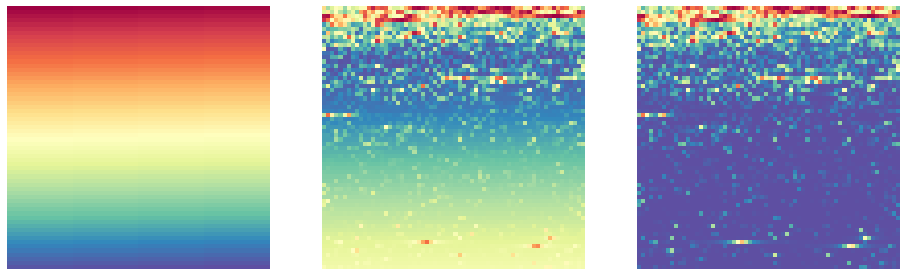

In [21]:
frames = [wave, flux, norm]
for a, the in enumerate(frames):
    sub = np.copy(the[ww])
    sub.resize((4096, 66))
    sqr = spec2sqr(
            robust_scale(
                spectres(new, wave, the)))
                        #.reshape(-1,1)))
    plt.subplot(131+a)
    plt.xticks([]); plt.yticks([])
    plt.imshow(sqr)

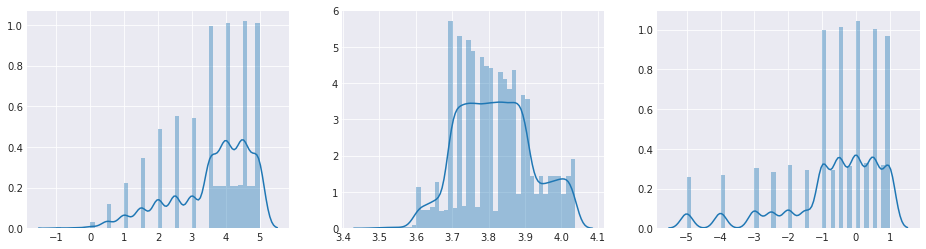

In [22]:
data = np.load("pollux.npy")
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(131+i)
#    plt.xticks([]); plt.yticks([])
    sns.distplot(data[:,i])

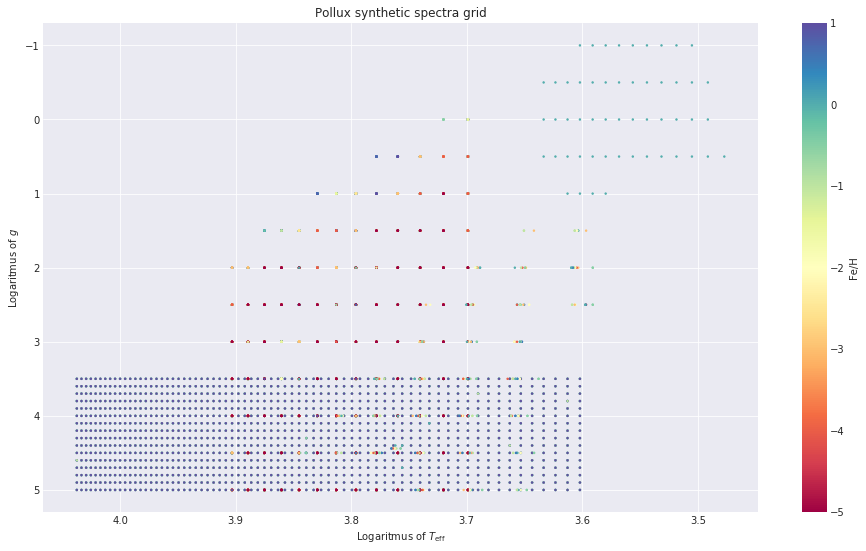

In [31]:
plt.title("Pollux synthetic spectra grid")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.gca().invert_xaxis(); plt.gca().invert_yaxis()
plt.scatter(data[:,1], data[:,0], c=data[:,2], s=2);
plt.colorbar().ax.set_ylabel("Fe/H");